In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
import math
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import tree
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


In [2]:
X_train = pd.read_pickle('X_train.pkl')
y_train= pd.read_pickle('y_train.pkl')

X_test= pd.read_pickle('X_test.pkl')
y_test= pd.read_pickle('y_test.pkl')



### normalization

In [3]:
scaler = MinMaxScaler()

In [4]:
X_train.describe()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,29.344479,0.576244,0.386838,31.840730,0.341894,0.658106,0.176565,0.088283,0.735152,0.223114,0.211878,0.565008
std,13.028013,1.216267,0.807692,51.027372,0.474725,0.474725,0.381607,0.283933,0.441607,0.416669,0.408967,0.496154
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,35.000000,1.000000,0.000000,30.750000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
target = ['Age', 'SibSp', 'Parch', 'Fare']

In [6]:
X_train[target] = scaler.fit_transform(X_train[target])

In [7]:
X_test[target] = scaler.transform(X_test[target])

In [8]:
X_train.describe()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.363464,0.072030,0.064473,0.062149,0.341894,0.658106,0.176565,0.088283,0.735152,0.223114,0.211878,0.565008
std,0.163710,0.152033,0.134615,0.099599,0.474725,0.474725,0.381607,0.283933,0.441607,0.416669,0.408967,0.496154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.000000,0.000000,0.015469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.434531,0.125000,0.000000,0.060020,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X_test.describe()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.378280,0.049907,0.061567,0.064508,0.376866,0.623134,0.216418,0.082090,0.701493,0.287313,0.194030,0.518657
std,0.162453,0.095633,0.133936,0.090813,0.485507,0.485507,0.412573,0.275015,0.458459,0.453356,0.396192,0.500587
min,0.005152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280598,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.367921,0.000000,0.000000,0.028213,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.447097,0.125000,0.000000,0.060642,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,0.886906,0.500000,0.833333,0.512122,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
clf = SVC()

In [11]:
clf.fit(X_train,y_train)

SVC()

In [12]:
y_pred = clf.predict(X_test) 

In [13]:
accuracy_score(y_pred,y_test)

0.7985074626865671

In [14]:
c = np.logspace(-2,5,29)

In [15]:
ac_test = []
ac_train = []

In [16]:
for cc in c:
    clf = SVC(C=cc)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test) 
    y_pred_train = clf.predict(X_train)
    y_pred = accuracy_score(y_pred,y_test)
    y_pred_train = accuracy_score(y_pred_train,y_train)
    ac_test.append(y_pred)
    ac_train.append(y_pred_train)
    print(f"C = {cc} , \n\ test {y_pred} \n\ train {y_pred_train}")

C = 0.01 , 
\ test 0.585820895522388 
\ train 0.6292134831460674
C = 0.01778279410038923 , 
\ test 0.7611940298507462 
\ train 0.7720706260032103
C = 0.03162277660168379 , 
\ test 0.8134328358208955 
\ train 0.8138041733547352
C = 0.05623413251903491 , 
\ test 0.7985074626865671 
\ train 0.8170144462279294
C = 0.1 , 
\ test 0.7985074626865671 
\ train 0.8170144462279294
C = 0.1778279410038923 , 
\ test 0.7985074626865671 
\ train 0.8170144462279294
C = 0.31622776601683794 , 
\ test 0.7985074626865671 
\ train 0.8170144462279294
C = 0.5623413251903491 , 
\ test 0.7985074626865671 
\ train 0.8170144462279294
C = 1.0 , 
\ test 0.7985074626865671 
\ train 0.8202247191011236
C = 1.7782794100389228 , 
\ test 0.7985074626865671 
\ train 0.8202247191011236
C = 3.1622776601683795 , 
\ test 0.7985074626865671 
\ train 0.8202247191011236
C = 5.623413251903491 , 
\ test 0.8059701492537313 
\ train 0.8314606741573034
C = 10.0 , 
\ test 0.8022388059701493 
\ train 0.8330658105939005
C = 17.782794100

In [17]:
ac_test

[0.585820895522388,
 0.7611940298507462,
 0.8134328358208955,
 0.7985074626865671,
 0.7985074626865671,
 0.7985074626865671,
 0.7985074626865671,
 0.7985074626865671,
 0.7985074626865671,
 0.7985074626865671,
 0.7985074626865671,
 0.8059701492537313,
 0.8022388059701493,
 0.7985074626865671,
 0.7910447761194029,
 0.7985074626865671,
 0.8097014925373134,
 0.8134328358208955,
 0.8097014925373134,
 0.7910447761194029,
 0.7910447761194029,
 0.7910447761194029,
 0.7985074626865671,
 0.7985074626865671,
 0.7910447761194029,
 0.7873134328358209,
 0.7835820895522388,
 0.7835820895522388,
 0.7761194029850746]

(0.0, 1000.0)

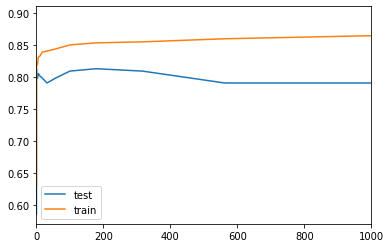

In [26]:
plt.plot(c,ac_test)
plt.plot(c,ac_train)
plt.legend(['test', 'train'])
plt.xlim(0,1000)
# plt.ylim(0,1000)

#### c =177

In [19]:
clf = SVC(C=177)
clf.fit(X_train,y_train)

SVC(C=177)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
accuracy_score(y_pred,y_test)

0.8134328358208955

In [22]:
test = pd.read_pickle('test.pkl')

In [23]:
predictions = clf.predict(test)

In [24]:
output = pd.DataFrame({'PassengerId': test.index, 'Survived': predictions})
output.to_csv('submissionSVC.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
